In [1]:
import sys
import os

# Add the project root to sys.path
sys.path.append(os.path.abspath(".."))

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from fair_segmentation.partition_estimation import compute_partition
from fair_segmentation.fairness_metrics import compute_phi_sp_ci
from fair_segmentation.visualization import plot_partition, plot_partition_with_ci

In [2]:
data_root = '/data/raw_data/veronika_shilova/celeba_female_cross_val_5_epoch'

df_female = pd.read_csv(os.path.join(data_root, 'df_female.csv'))

In [3]:
ita = df_female['ITA'].values
y_pred = df_female['y_pred']

In [4]:
nb_groups = 6

## FairSeg partition of $ITA$

In [5]:
result_fairseg = compute_partition("fairseg", nb_groups, ita, y_pred)

100%|████████████████████████████| 67910864/67910864 [20:54<00:00, 54143.43it/s]


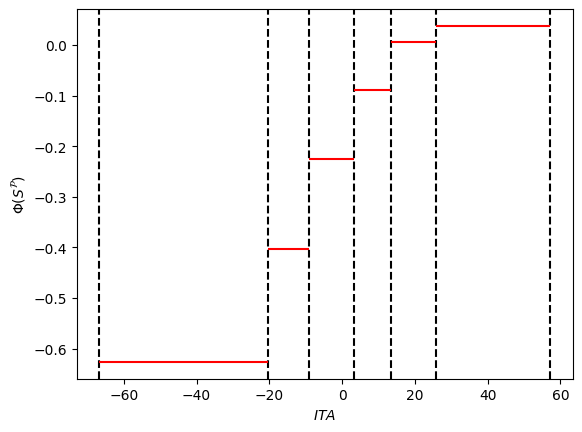

In [6]:
plot_partition(result_fairseg['partition'], result_fairseg['phi'])

In [15]:
S_fairseg = [(ita >= result_fairseg['partition'][i]) & (ita <= result_fairseg['partition'][i+1]) 
             for i in range(nb_groups)]

fairseg_partition_ci = np.array([compute_phi_sp_ci(S_fairseg[i], y_pred, alpha=.95) 
                                 for i in range(nb_groups)])

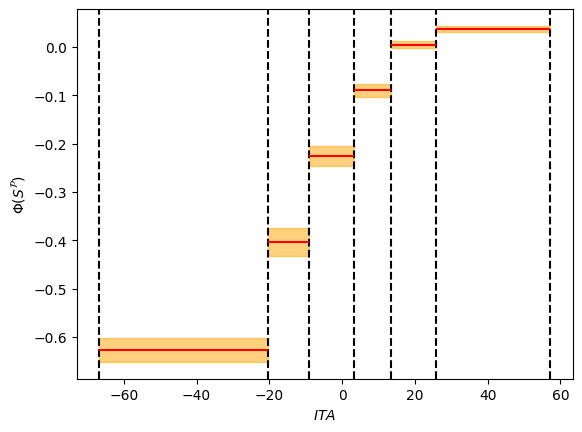

In [16]:
plot_partition_with_ci(result_fairseg['partition'], fairseg_partition_ci)

## K-Means partition of ITA

In [5]:
result_kmeans = compute_partition("k-means", nb_groups, ita, y_pred)

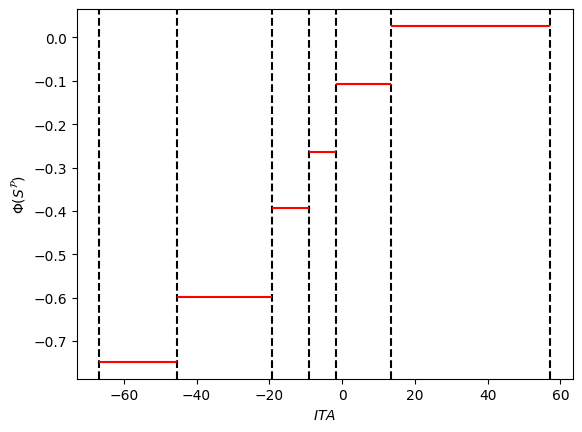

In [6]:
plot_partition(result_kmeans['partition'], result_kmeans['phi'])

In [11]:
S_kmeans = [(ita >= result_kmeans['partition'][i]) & (ita <= result_kmeans['partition'][i+1]) 
            for i in range(nb_groups)]

kmeans_partition_ci = np.array([compute_phi_sp_ci(S_kmeans[i], y_pred, alpha=.95) 
                                for i in range(nb_groups)])

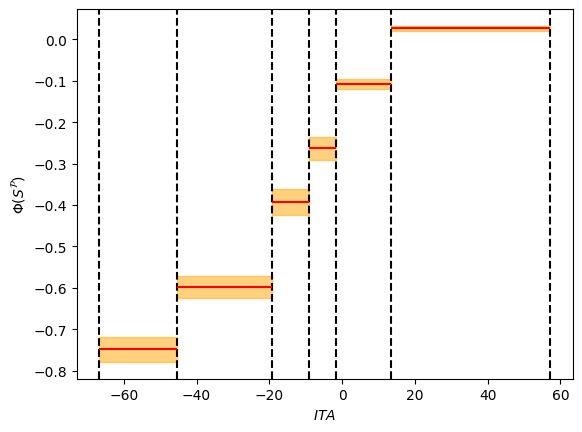

In [12]:
plot_partition_with_ci(result_kmeans['partition'], kmeans_partition_ci)